# Libraries Installation

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# Helper Functions

In [ ]:
def read(filename):
  imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
  img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
  return img_result
    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.figure(figsize=(16, 10))
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
    img = list_of_images[idx]
    subplot.imshow(img)
    # plt.axis("off")
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

## Show Original Images

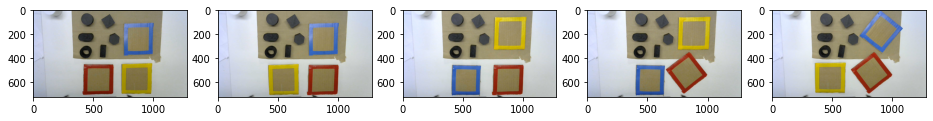

In [ ]:
img1,img2,img3,img4,img5 = read('img1.jpg'), read('img2.jpg'),read('img3.jpg'), read('img4.jpg'),read('img5.jpg')
showInRow([img1,img2,img3,img4,img5])

## Red Region Detection Function

In [ ]:
# def red_region(img):
#   img_copy = img.copy()
#   # split to three channels
#   img_r, img_g, img_b = cv2.split(img_copy)
#   # detecting red regions
#   for i in range(img_copy.shape[0]):
#     for j in range(img_copy.shape[1]):
#       if (img_r[i,j]>=100) and (img_r[i,j]<=172) and (img_g[i,j]>=17) and (img_g[i,j]<=87) and (img_b[i,j]>=0) and (img_b[i,j]<=73):
#         # img_copy[i,j] = 255
#         pass
#       else: 
#         img_copy[i,j] = 0
#   return img_copy

def red_region(img):
  img_copy = img.copy()
  lower = [100, 17, 0] # min(R,G,B)
  upper = [172, 87, 73] # max(R,G,B)
  lower = np.array(lower, dtype="uint8")
  upper = np.array(upper, dtype="uint8")
  mask = cv2.inRange(img_copy, lower, upper)
  output = cv2.bitwise_and(img_copy, img_copy, mask=mask)
  return output

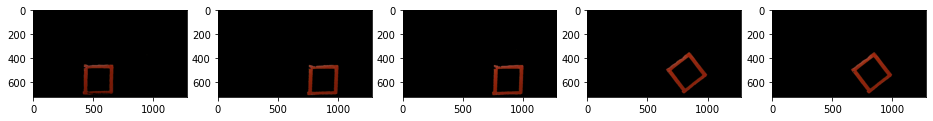

In [ ]:
img1_red,img2_red,img3_red,img4_red,img5_red = red_region(img1),red_region(img2),red_region(img3),red_region(img4),red_region(img5)
showInRow([img1_red,img2_red,img3_red,img4_red,img5_red])

## Yellow Region Detection Function

In [ ]:
# def yellow_region(img):
#   img_copy = img.copy()
#   # split to three channels
#   img_rr, img_gg, img_bb = cv2.split(img_copy)
#   # detecting yellow regions
#   for i in range(img_copy.shape[0]):
#     for j in range(img_copy.shape[1]):
#       if (img_rr[i,j]>=140) and (img_rr[i,j]<=238) and (img_gg[i,j]>=108) and (img_gg[i,j]<=212) and (img_bb[i,j]>=0) and (img_bb[i,j]<=69):
#         # img_copy[i,j] = 255
#         pass
#       else: 
#         img_copy[i,j] = 0
#   return img_copy

def yellow_region(img):
  img_copy = img.copy()
  lower = [140, 108, 0] # min(R,G,B)
  upper = [238, 212, 69] # max(R,G,B)
  lower = np.array(lower, dtype="uint8")
  upper = np.array(upper, dtype="uint8")
  mask = cv2.inRange(img_copy, lower, upper)
  output = cv2.bitwise_and(img_copy, img_copy, mask=mask)
  return output

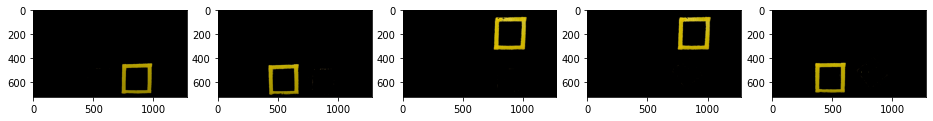

In [ ]:
img1_y,img2_y,img3_y,img4_y,img5_y = yellow_region(img1), yellow_region(img2),yellow_region(img3), yellow_region(img4),yellow_region(img5)
showInRow([img1_y,img2_y,img3_y,img4_y,img5_y])

## Blue Region Detection Function

In [ ]:
# def blue_region(img):
#   img_copy = img.copy()
#   # split to three channels
#   img_rrr, img_ggg, img_bbb = cv2.split(img_copy)
#   # detecting blue regions
#   for i in range(img_copy.shape[0]):
#     for j in range(img_copy.shape[1]):
#       if (img_rrr[i,j]>=28) and (img_rrr[i,j]<=135) and (img_ggg[i,j]>=64) and (img_ggg[i,j]<=159) and (img_bbb[i,j]>=144) and (img_bbb[i,j]<=238):
#         # img_copy[i,j] = 255
#         pass
#       else: 
#         img_copy[i,j] = 0
#   return img_copy

def blue_region(img):
  img_copy = img.copy()
  lower = [15,55, 123] # min(R,G,B)
  upper = [140, 159, 240] # max(R,G,B)
  lower = np.array(lower, dtype="uint8")
  upper = np.array(upper, dtype="uint8")
  mask = cv2.inRange(img_copy, lower, upper)
  output = cv2.bitwise_and(img_copy, img_copy, mask=mask)
  return output

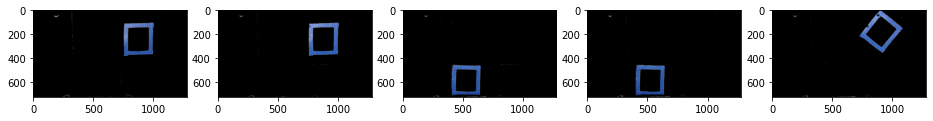

In [ ]:
img1_b,img2_b,img3_b,img4_b,img5_b = blue_region(img1), blue_region(img2),blue_region(img3), blue_region(img4),blue_region(img5)
showInRow([img1_b,img2_b,img3_b,img4_b,img5_b])

## Center Localization Function
In this function:
- Morphology operations are applied.
- Contours are detecetd.
- Contours areas are thresholded.
- Momentum is used to localize the inner contour center.

In [ ]:
def localize_center(img, idx):
  img_copy = img.copy()
  if idx == 0:
    res = red_region(img_copy)

  elif idx == 1:
    res = yellow_region(img_copy)

  elif idx == 2:
    res = blue_region(img_copy)

  # erosion
  kernel = np.ones((3,3),np.uint8)
  erosion1 = cv2.erode(res,kernel,iterations = 1)

  # dilation
  kernel = np.ones((9,9),np.uint8)
  dilation = cv2.dilate(erosion1,kernel,iterations = 5)

  # erosion
  kernel = np.ones((9,9),np.uint8)
  erosion2 = cv2.erode(dilation,kernel,iterations = 5)

  contours, hierarchy = cv2.findContours(erosion2[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  contours_list = [i for i in contours if cv2.contourArea(i) > 15000]

  if len(contours_list) > 0:
    print('Number of contour: {}'.format(len(contours_list)))

    cv2.drawContours(img_copy, contours_list, -1, (255,0,0), 3)
    contour = contours_list[-1]
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f'Inner contor center coordinates: ({cx},{cy})')

    cv2.circle(img_copy,(cx,cy), 5, (255,0,255), -1)
    return res, erosion1, dilation, erosion2, img_copy

  else:
    print('No contours found')


### Red Region Output

Number of contour: 2
Inner contor center coordinates: (830,519)


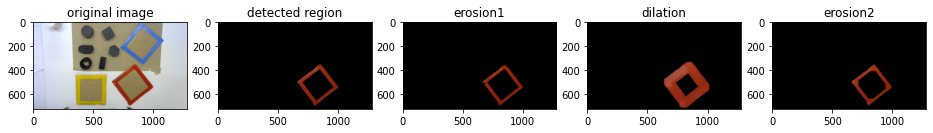

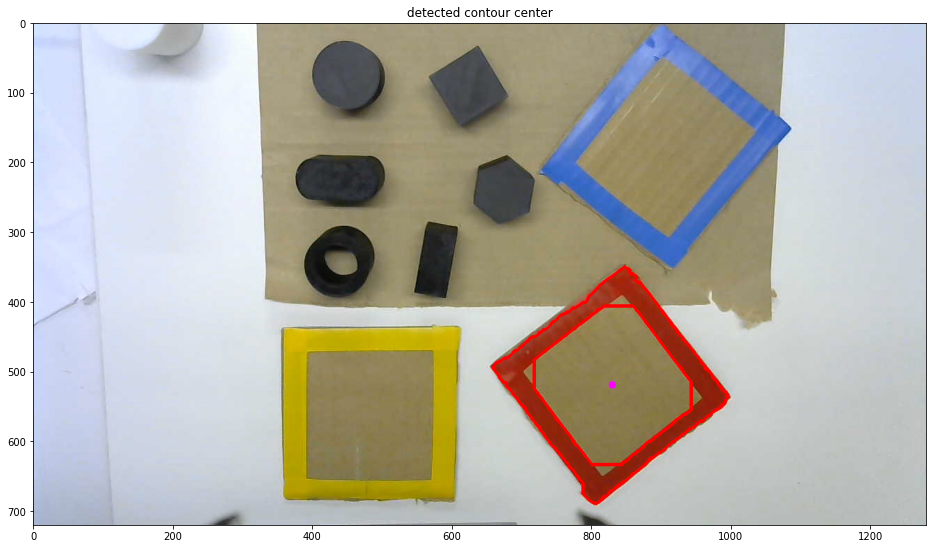

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(img5,0)
showInRow([img5, res, erosion1, dilation, erosion2],['original image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])

### Yellow Region Output

Number of contour: 2
Inner contor center coordinates: (482,564)


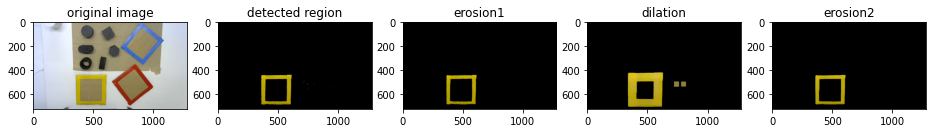

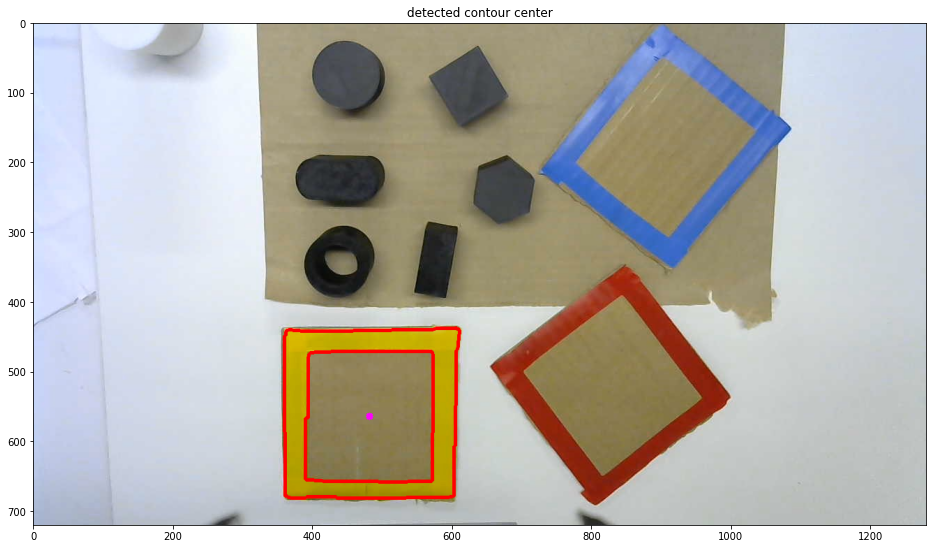

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(img5,1)
showInRow([img5, res, erosion1, dilation, erosion2],['original image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])

### Blue Region Output

Number of contour: 2
Inner contor center coordinates: (876,241)


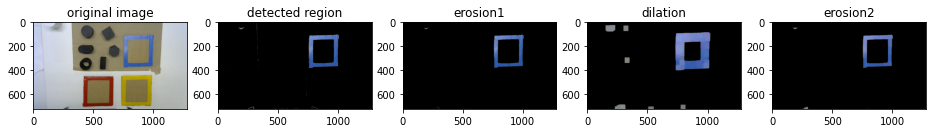

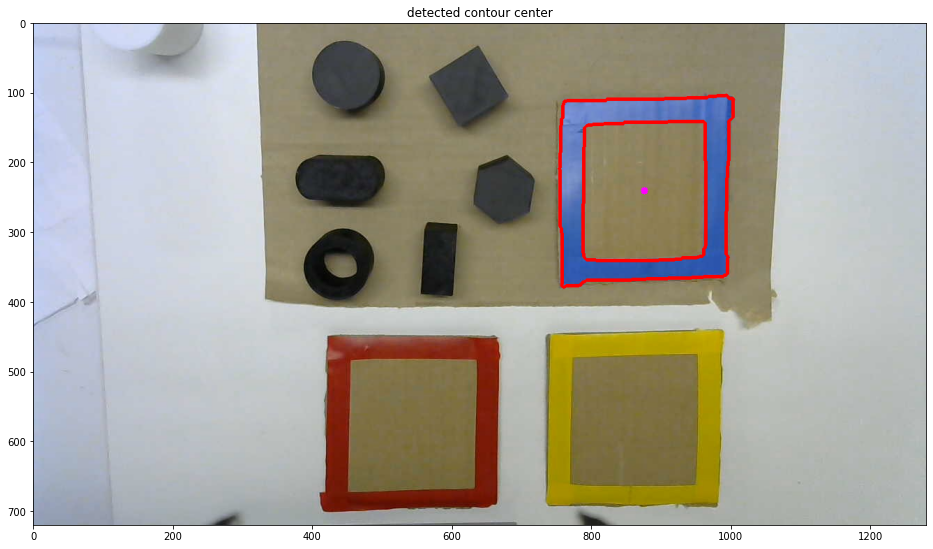

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(img1,2)
showInRow([img1, res, erosion1, dilation, erosion2],['original image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])

# Testing
Different images are captured with illumination change for testing.

## Read and Show Test Images

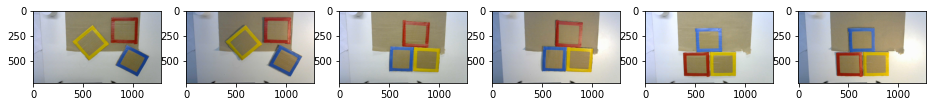

In [ ]:
test1,test2,test3,test4,test5,test6 = read('test1.jpg'),read('test2.jpg'),read('test3.jpg'),read('test4.jpg'),read('test5.jpg'),read('test6.jpg')
showInRow([test1,test2,test3,test4,test5,test6])

### Red Region Test

Number of contour: 2
Inner contor center coordinates: (914,192)


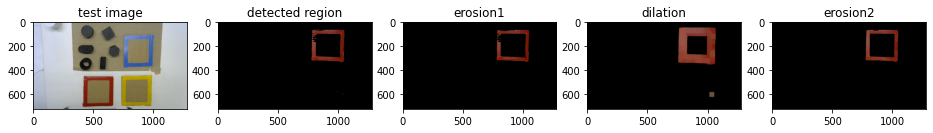

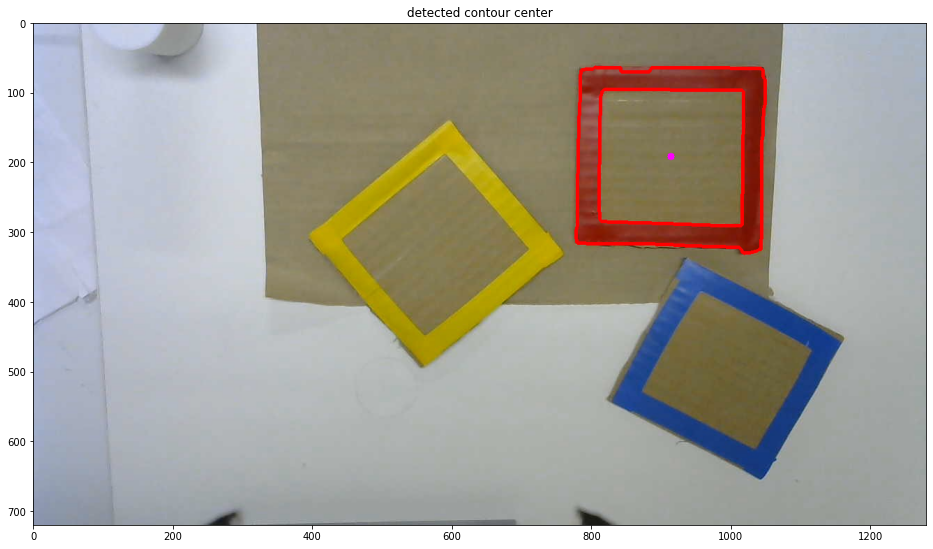

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(test1,0)
showInRow([img1, res, erosion1, dilation, erosion2],['test image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])

### Yellow Region Test

Number of contour: 2
Inner contor center coordinates: (576,319)


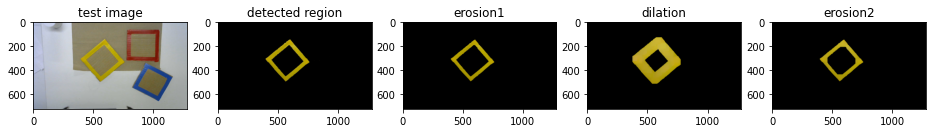

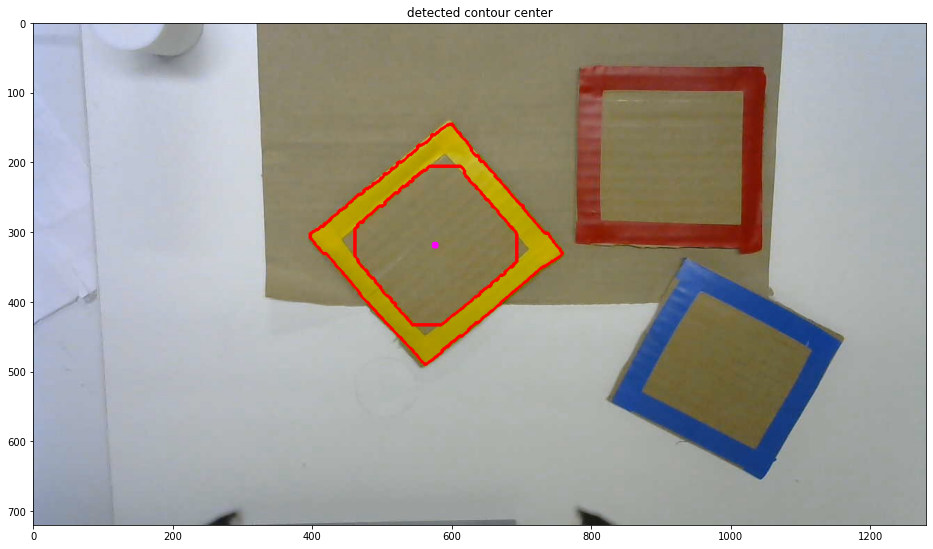

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(test1,1)
showInRow([test1, res, erosion1, dilation, erosion2],['test image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])

### Blue Region Test

Number of contour: 2
Inner contor center coordinates: (623,482)


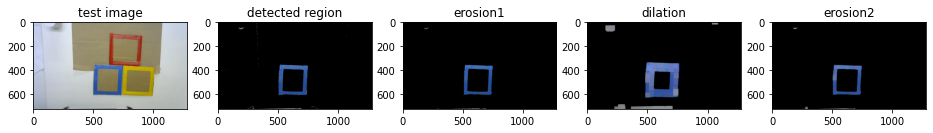

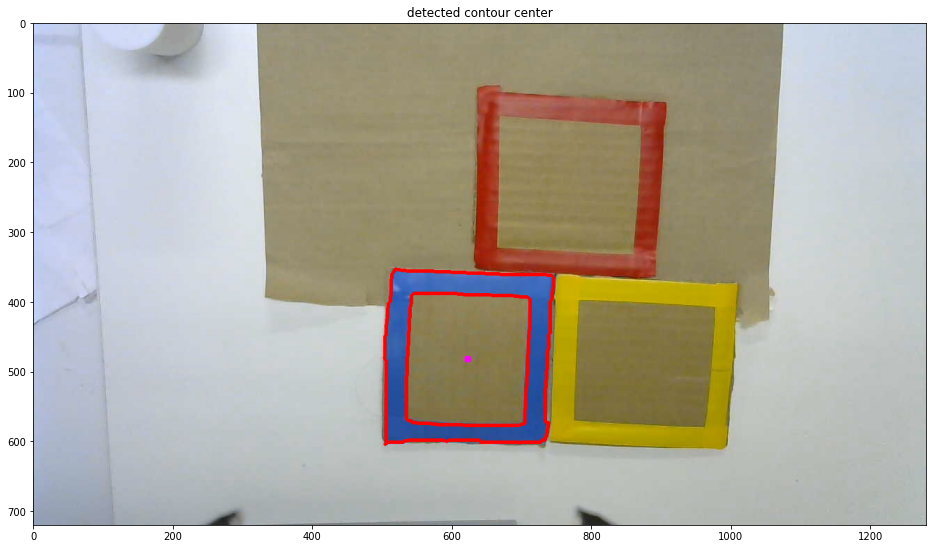

In [ ]:
res, erosion1, dilation, erosion2, img_copy = localize_center(test3,2)
showInRow([test3, res, erosion1, dilation, erosion2],['test image', 'detected region', 'erosion1', 'dilation', 'erosion2'])
showInRow([img_copy],['detected contour center'])